Описание датасета

school — аббревиатура школы, в которой учится ученик
sex — пол ученика ('F' - женский, 'M' - мужской)
age — возраст ученика (от 15 до 22)
address — тип адреса ученика ('U' - городской, 'R' - за городом)
famsize — размер семьи('LE3' <= 3, 'GT3' >3)
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
schoolsup — дополнительная образовательная поддержка (yes или no)
famsup — семейная образовательная поддержка (yes или no)
paid — дополнительные платные занятия по математике (yes или no)
activities — дополнительные внеучебные занятия (yes или no)
nursery — посещал детский сад (yes или no)
higher — хочет получить высшее образование (yes или no)
internet — наличие интернета дома (yes или no)
romantic — в романтических отношениях (yes или no)
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
absences — количество пропущенных занятий
score — баллы по госэкзамену по математике

Предварительные выводы, которые мы можем сделать из описания:
-Численные признаки - age, absences, score
-Категориальные - school, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health 

импортируем необходимые для работы библиотеки

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

читаем датасет

In [59]:
stud_math = pd.read_csv('/Users/ioksana/Desktop/Machine Learning/EDA_Unit_2/stud_math.csv')
stud_math.shape #получили размер датафрейма
pd.set_option('display.max_columns', 30) # показывать все колонки - внезапно столбцов у нас 30, а не 29
stud_math.info() #получили информацию о данных в датафрейме
display(stud_math.head(30)) #просмотрели первые 30 строк датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Приведем к единообразному виду названия столбцов

In [60]:
stud_math.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job','studytime, granular':'studytime_granular'}, inplace=True)  

Проверим наличие пустых значений

In [61]:
stud_math.isna().sum()

school                 0
sex                    0
age                    0
address               17
famsize               27
p_status              45
m_edu                  3
f_edu                 24
m_job                 19
f_job                 36
reason                17
guardian              31
traveltime            28
studytime              7
failures              22
schoolsup              9
famsup                39
paid                  40
activities            14
nursery               16
studytime_granular     7
higher                20
internet              34
romantic              31
famrel                27
freetime              11
goout                  8
health                15
absences              12
score                  6
dtype: int64

Строки с пропущенным значение score не несут для нас ценности, удаляем

In [62]:
stud_math=stud_math.dropna(subset=['score'])

Посмотрим матрицу корреляции и проанализируем

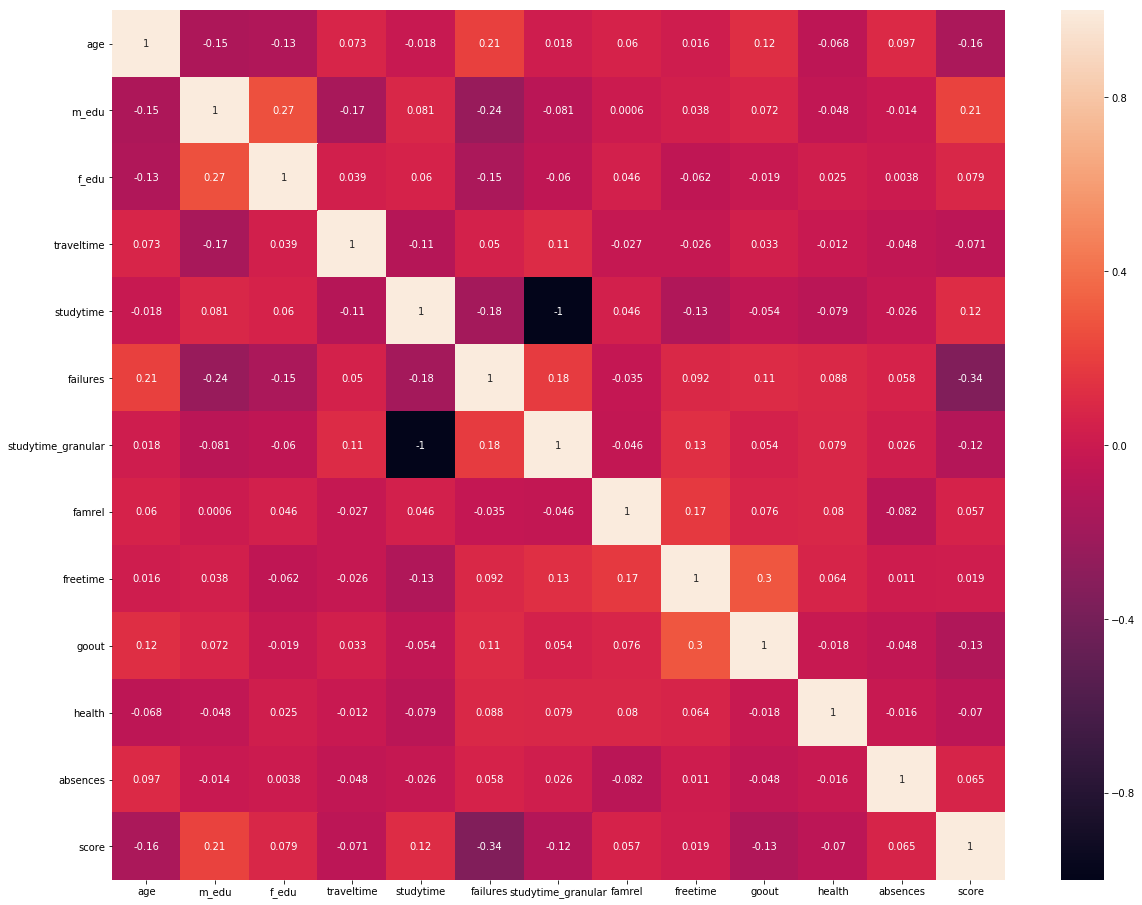

In [63]:
plt.figure(figsize=(20, 16))
sns.heatmap(stud_math.corr(), annot=True) 

Видим, что столбцы studytime и studytime_granular линейно зависимы, удаляем лишний столбец studytime_granular

In [64]:
stud_math.drop(['studytime_granular'], inplace = True, axis = 1) 

В датасете есть всего три численных признака, проанализируем для начала их. Определим функцию, которая умеет считать IQR для заданного столбца

In [65]:
def IQR(df,column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    if (df[column].max() > (perc75 + 1.5*IQR)) | (df[column].min() < (perc25 - 1.5*IQR)):
        print('В столбце {} есть выбросы'.format(column))
        print("Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
        display(df[column].describe())
        sns.countplot(x = column, data = df)
        plt.show()

Первый числовой признак. Анализируем возраст

In [66]:
pd.DataFrame(stud_math.age.value_counts()) 

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

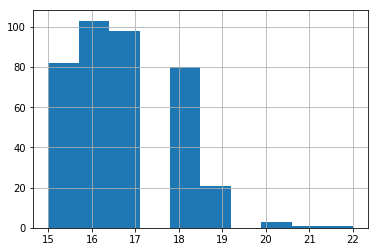

In [67]:
stud_math.age.hist()
stud_math.age.describe()

Мы видим, что в столбце нет пропусков, однако гистограмма выглядит подозрительно, возможно есть выбросы. Посмотрим на боксплот

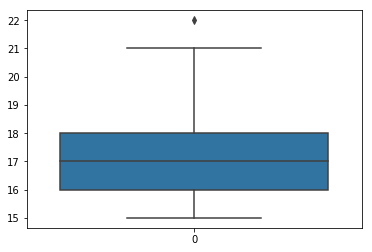

In [68]:
sns.boxplot(data=stud_math.age)

Боксплот говорит что выброс таки есть, проверяем IQR

В столбце age есть выбросы
Границы выбросов: [13.0, 21.0].


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

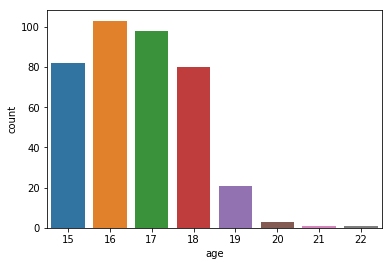

In [69]:
IQR(stud_math,'age')

тут значение 22 становится еще более подозрительным. Это выброс. Удаляем из датасета

In [70]:
stud_math=stud_math.loc[stud_math.age<22]

Второй числовой признак. Анализируем прогулы

In [71]:
pd.DataFrame(stud_math.absences.value_counts()) 

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

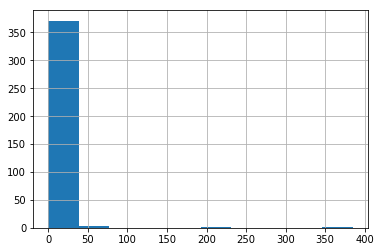

In [72]:
stud_math.absences.hist()
stud_math.absences.describe()

Видим, что у нас две проблемы
1. Кажется, тут могут быть выбросы.
2. Возможно нужно заполнить пропущенные значения
Постмотрим на боксплот

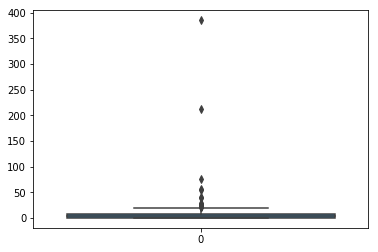

In [73]:
sns.boxplot(data=stud_math.absences)

Боксплот говорит - выбросы есть и много. Посмотрим IQR

В столбце absences есть выбросы
Границы выбросов: [-12.0, 20.0].


count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

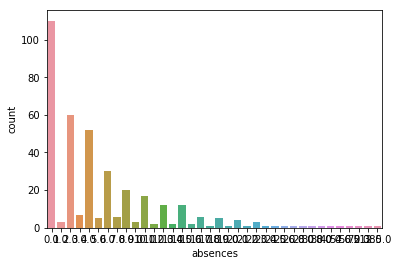

In [74]:
IQR(stud_math,'absences')

Выглядит так, что либо у нас очень грязный столбец - либо распределение отличается от нормального. Покрутим данные 

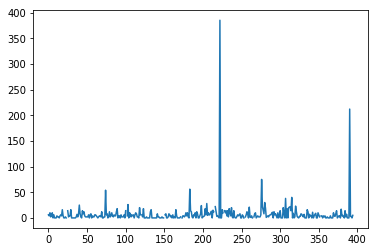

In [75]:
stud_math.absences.plot.line()

Посмотрим внимательно на самые сильно выбивающиеся значения

In [76]:
stud_math[stud_math.absences>200] #отсечку 200 взяли по графику, чисто визуально

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Закономерностей в двух подозрительных записях на первый взгляд не видно. 
Посмотрим внимательно на датафрейм без выбросов

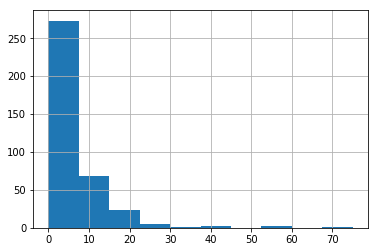

In [77]:
stud_math_without=stud_math[stud_math.absences<200]  
stud_math_without.absences.hist()

а это уже напоминает классическое логарифмическое распределение. Попробуем обойтись без удаления данных и посмотрим на боксплот для логарифма

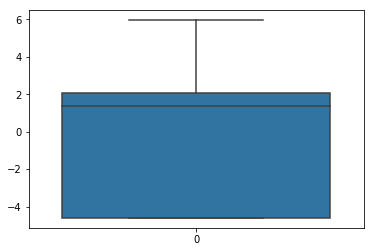

In [78]:
sns.boxplot(data=stud_math.absences.apply(lambda x: math.log(x+0.01)))  
#нужен небольшой сдвиг - с нулем функция не заработает

даже без удаления сильно выбивающихся данных - боксплот для логарифмической функции выбросов не содержит, видимо, мы работали с длинным хвостом логарифмического распределения. Выбросов нет. Теперь попробуем заполнить недостающие данные

In [79]:
absences_fill = stud_math[stud_math.absences.isnull()]
absences_fill

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


Видим, что school=GP у всех записей, кроме одной, p_status=T (либо NaN), schoolsup=no (кроме одной записи)
При построении модели и заполнении данных - можно попробовать опираться на распределение значения absences для остальных записей

Третий числовой признак. Анализируем результат

In [80]:
pd.DataFrame(stud_math.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,27
80.0,16


count    388.000000
mean      52.293814
std       22.940126
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

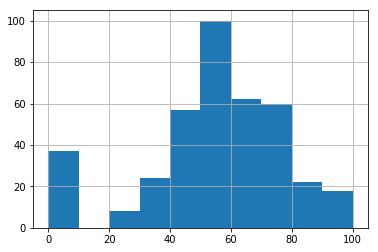

In [81]:
stud_math.score.hist(bins=10)
stud_math.score.describe()

Выглядит как классическое нормальное распределение. Скорее всего те, кто получил нулевой результат - вовсе не сдавали экзамен. Разобьём наш датасет на два - выделим отдельно тех студентов, у кого нулевой результат, и отдельно - всех остальных

In [82]:
stud_math_pass = stud_math.query('score > 0')
stud_math_fail = stud_math.query('score == 0')

Проведем корреляционный анализ для обоих датасетов

/Users/ioksana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ioksana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/ioksana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


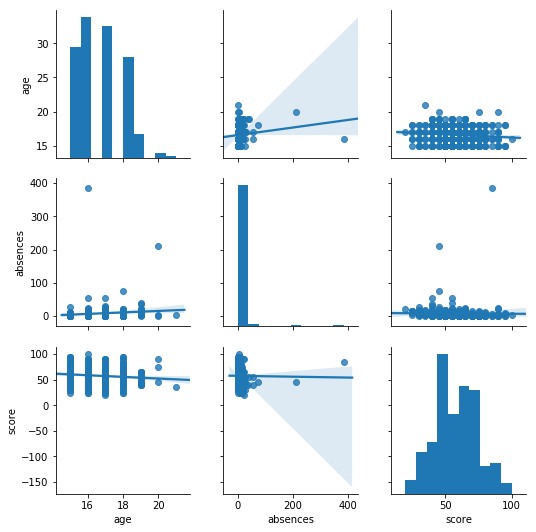

In [83]:
sns.pairplot(stud_math_pass, vars=['age', 'absences', 'score'], kind = 'reg')

In [84]:
stud_math_pass.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.128496,-0.115717,0.106431,0.004173,0.193357,0.060890,-0.004895,0.105288,-0.034894,0.111619,-0.121579
m_edu,-0.128496,1.000000,0.247965,-0.165172,0.071324,-0.213732,-0.001558,0.020621,0.080020,-0.037430,-0.027540,0.187362
f_edu,-0.115717,0.247965,1.000000,0.040695,0.046492,-0.136663,0.052347,-0.069734,-0.022746,0.022018,0.000923,0.067631
traveltime,0.106431,-0.165172,0.040695,1.000000,-0.104204,0.102888,-0.021596,-0.021618,0.032921,-0.003545,-0.047003,-0.077795
studytime,0.004173,0.071324,0.046492,-0.104204,1.000000,-0.144656,0.068634,-0.126209,-0.023394,-0.092776,-0.029085,0.138663
failures,0.193357,-0.213732,-0.136663,0.102888,-0.144656,1.000000,-0.027694,0.121114,0.107974,0.090303,0.087925,-0.283792
famrel,0.060890,-0.001558,0.052347,-0.021596,0.068634,-0.027694,1.000000,0.160054,0.044794,0.103703,-0.090936,0.050785
freetime,-0.004895,0.020621,-0.069734,-0.021618,-0.126209,0.121114,0.160054,1.000000,0.294065,0.077300,0.007001,-0.010068
goout,0.105288,0.080020,-0.022746,0.032921,-0.023394,0.107974,0.044794,0.294065,1.000000,-0.000800,-0.052531,-0.177771
health,-0.034894,-0.037430,0.022018,-0.003545,-0.092776,0.090303,0.103703,0.077300,-0.000800,1.000000,-0.012678,-0.081702


Видим, что корреляция между возрастом, прогулами и результатами экзаменов для этого датасета слабая

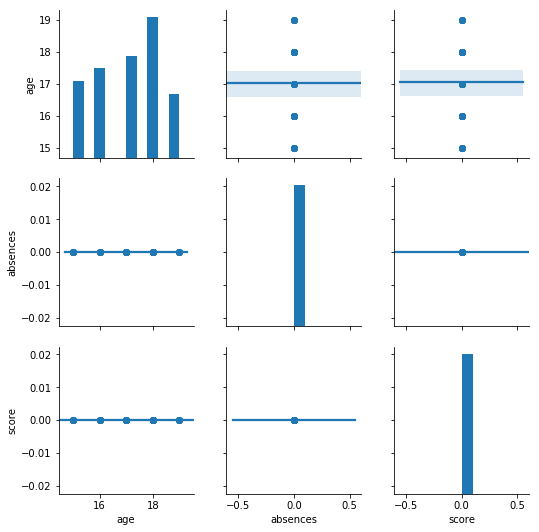

In [85]:
sns.pairplot(stud_math_fail, vars=['age', 'absences', 'score'], kind = 'reg')

In [86]:
stud_math_fail.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.277001,-0.308023,-0.173553,-0.043985,-0.062840,-0.013915,0.189722,0.090751,-0.224359,NaN,NaN
m_edu,-0.277001,1.000000,0.763420,-0.139369,0.138471,-0.314499,-0.053375,0.178854,0.024078,-0.104942,NaN,NaN
f_edu,-0.308023,0.763420,1.000000,0.013349,0.243154,-0.257808,-0.038095,0.108777,0.126071,0.040732,NaN,NaN
traveltime,-0.173553,-0.139369,0.013349,1.000000,-0.141737,-0.247421,-0.061199,-0.067848,0.046303,-0.144564,NaN,NaN
studytime,-0.043985,0.138471,0.243154,-0.141737,1.000000,-0.345101,-0.099838,-0.102243,-0.223221,-0.000755,NaN,NaN
failures,-0.062840,-0.314499,-0.257808,-0.247421,-0.345101,1.000000,-0.136602,0.004118,0.031227,0.199496,NaN,NaN
famrel,-0.013915,-0.053375,-0.038095,-0.061199,-0.099838,-0.136602,1.000000,0.279762,0.271268,-0.068486,NaN,NaN
freetime,0.189722,0.178854,0.108777,-0.067848,-0.102243,0.004118,0.279762,1.000000,0.319699,-0.017763,NaN,NaN
goout,0.090751,0.024078,0.126071,0.046303,-0.223221,0.031227,0.271268,0.319699,1.000000,-0.093742,NaN,NaN
health,-0.224359,-0.104942,0.040732,-0.144564,-0.000755,0.199496,-0.068486,-0.017763,-0.093742,1.000000,NaN,NaN


Видим что если студент не посещал лекции - его итоговая оценка равна нулю. Вывод очевидный) Дальше датафреймом прогульщиков можно не работать

Напишем функцию для анализа категорийных признаков

In [87]:
def category_analysis(df,column):
    df[column] = df[column].apply(lambda x: None if x == 'nan' else x )
    print('В столбце {} найдено {} уникальных значения'.format(column,len(df[column].unique())))
    print(df[column].unique())
    sns.countplot(x = column, data = df)
    plt.show()
    print('Значений, встречающихся более 15 раз: {}'.format((df[column].value_counts()>=15).sum()))

Теперь положим названия столбцов stud_math_pass в список

In [88]:
columns_list=stud_math_pass.columns.values.tolist()

Применим нашу функцию к списку

В столбце school найдено 2 уникальных значения
['GP' 'MS']


/Users/ioksana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


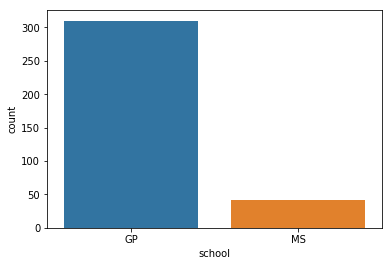

Значений, встречающихся более 15 раз: 2
В столбце sex найдено 2 уникальных значения
['F' 'M']


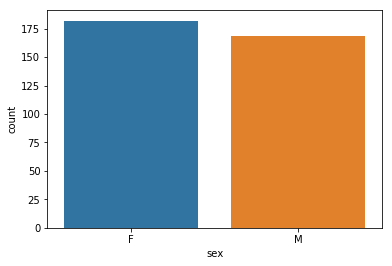

Значений, встречающихся более 15 раз: 2
В столбце address найдено 3 уникальных значения
['U' nan 'R']


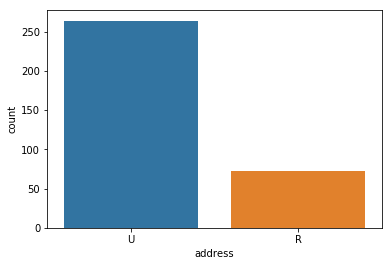

Значений, встречающихся более 15 раз: 2
В столбце famsize найдено 3 уникальных значения
[nan 'GT3' 'LE3']


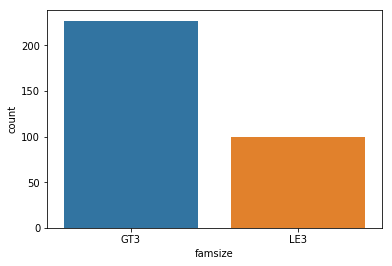

Значений, встречающихся более 15 раз: 2
В столбце p_status найдено 3 уникальных значения
['A' nan 'T']


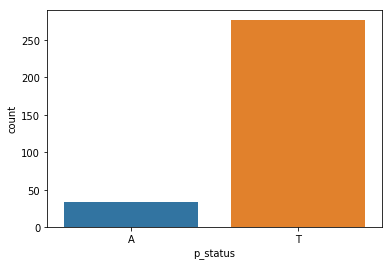

Значений, встречающихся более 15 раз: 2
В столбце m_edu найдено 6 уникальных значения
[ 4.  1.  3.  2. nan  0.]


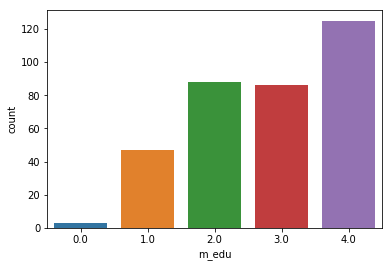

Значений, встречающихся более 15 раз: 4
В столбце f_edu найдено 7 уникальных значения
[ 4.  1.  2.  3. 40. nan  0.]


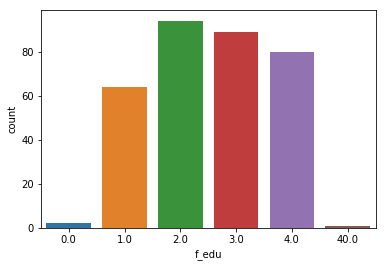

Значений, встречающихся более 15 раз: 4
В столбце m_job найдено 6 уникальных значения
['at_home' 'health' 'other' 'services' 'teacher' nan]


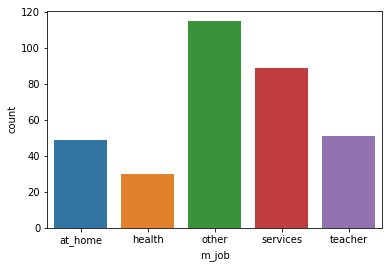

Значений, встречающихся более 15 раз: 5
В столбце f_job найдено 6 уникальных значения
['teacher' 'other' nan 'health' 'services' 'at_home']


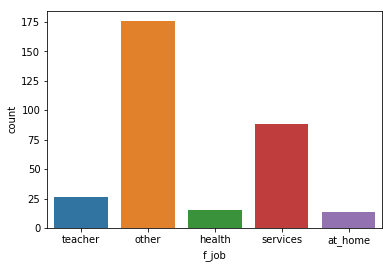

Значений, встречающихся более 15 раз: 4
В столбце reason найдено 5 уникальных значения
['course' 'other' 'home' 'reputation' nan]


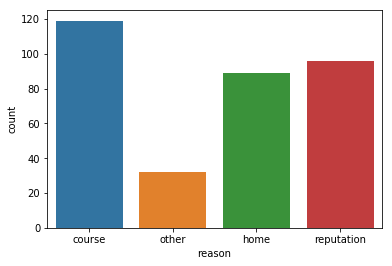

Значений, встречающихся более 15 раз: 4
В столбце guardian найдено 4 уникальных значения
['mother' 'father' 'other' nan]


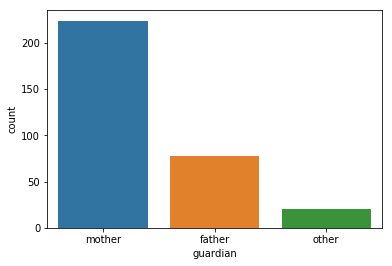

Значений, встречающихся более 15 раз: 3
В столбце traveltime найдено 5 уникальных значения
[ 2.  1.  3. nan  4.]


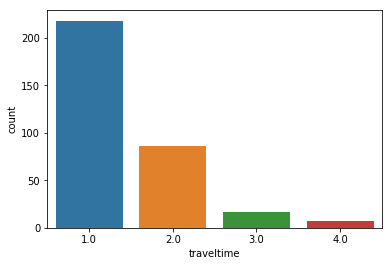

Значений, встречающихся более 15 раз: 3
В столбце studytime найдено 5 уникальных значения
[ 2.  3.  1. nan  4.]


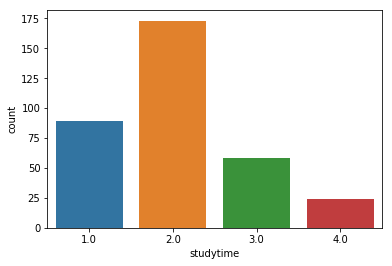

Значений, встречающихся более 15 раз: 4
В столбце failures найдено 5 уникальных значения
[ 0.  3. nan  2.  1.]


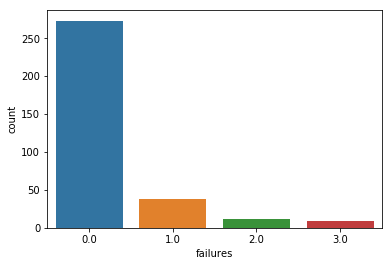

Значений, встречающихся более 15 раз: 2
В столбце schoolsup найдено 3 уникальных значения
['yes' 'no' nan]


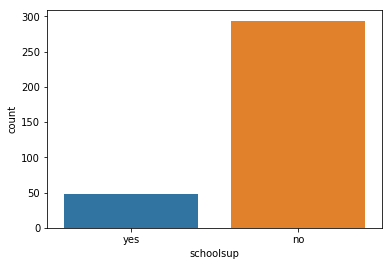

Значений, встречающихся более 15 раз: 2
В столбце famsup найдено 3 уникальных значения
['no' 'yes' nan]


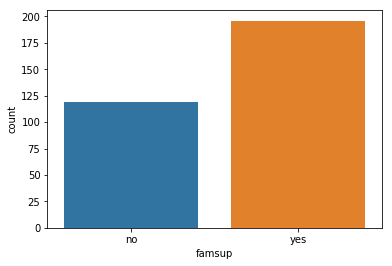

Значений, встречающихся более 15 раз: 2
В столбце paid найдено 3 уникальных значения
['no' nan 'yes']


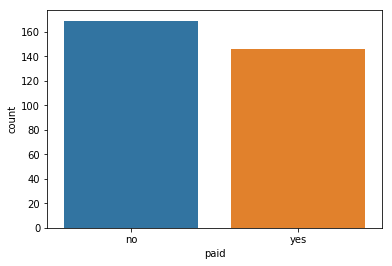

Значений, встречающихся более 15 раз: 2
В столбце activities найдено 3 уникальных значения
['no' 'yes' nan]


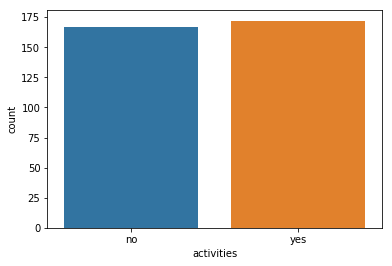

Значений, встречающихся более 15 раз: 2
В столбце nursery найдено 3 уникальных значения
['yes' 'no' nan]


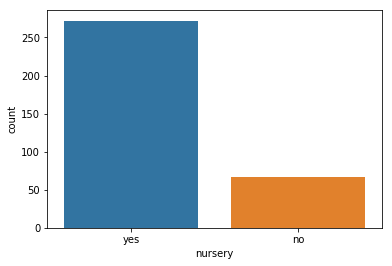

Значений, встречающихся более 15 раз: 2
В столбце higher найдено 3 уникальных значения
['yes' nan 'no']


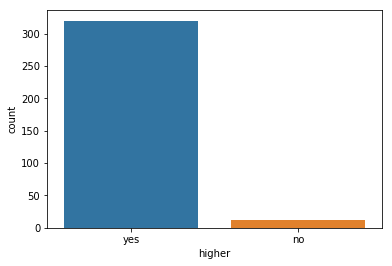

Значений, встречающихся более 15 раз: 1
В столбце internet найдено 3 уникальных значения
[nan 'yes' 'no']


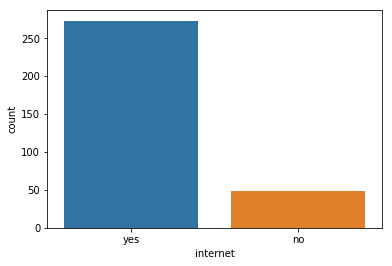

Значений, встречающихся более 15 раз: 2
В столбце romantic найдено 3 уникальных значения
['no' nan 'yes']


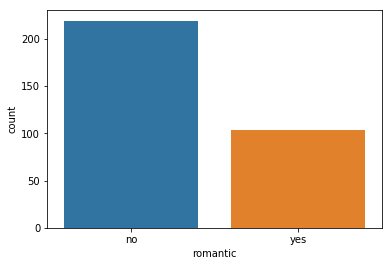

Значений, встречающихся более 15 раз: 2
В столбце famrel найдено 7 уникальных значения
[ 4.  5.  3. nan -1.  2.  1.]


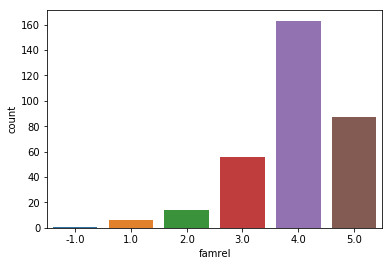

Значений, встречающихся более 15 раз: 3
В столбце freetime найдено 6 уникальных значения
[ 3.  2.  4.  1.  5. nan]


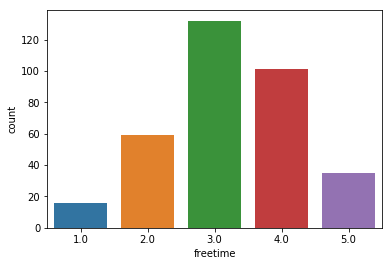

Значений, встречающихся более 15 раз: 5
В столбце goout найдено 6 уникальных значения
[ 4.  3.  2.  1.  5. nan]


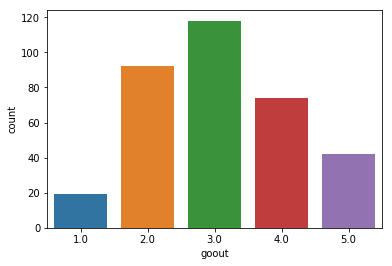

Значений, встречающихся более 15 раз: 5
В столбце health найдено 6 уникальных значения
[ 3.  5.  1.  2.  4. nan]


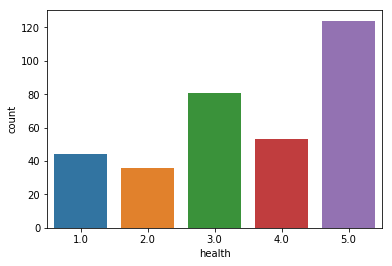

Значений, встречающихся более 15 раз: 5


In [89]:
for column in columns_list:
    if column not in ('age','score','absences'):
        category_analysis(stud_math_pass,column)

Всего в датафрейме stud_math_pass 350 записей, данные, встречающиеся чаще чем в 5%, подсветили отдельно 

В столбце f_edu найдено 7 уникальных значения, одно из этих значений -40. 
наиболее вероятно это опечатка, исправим её

In [90]:
stud_math_pass.loc[stud_math_pass['f_edu'] == 40.0, 'f_edu'] = 4.0

/Users/ioksana/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


В столбце famrel найдено 7 уникальных значения, одно из этих значений -1.
наиболее вероятно это тоже опечатка

In [91]:
stud_math_pass.loc[stud_math_pass['famrel'] == -1, 'famrel'] = 1.0

Заполнять пропуски пока не осмысленно
1. бОльшая часть nan встречается реже, чем в 5% случаев
2. пропуски guardian пока не понятно, по какому принципу можно заполнить
Зато хорошо бы посмотреть на попарную корреляцию наших категорийных признаков и итогового результата. 
Напишем функцию, которая построит боксплот

In [92]:
def boxplot_analysis(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=stud_math_pass)
    ax.set_title('Боксплот для ' + column)
    plt.show()

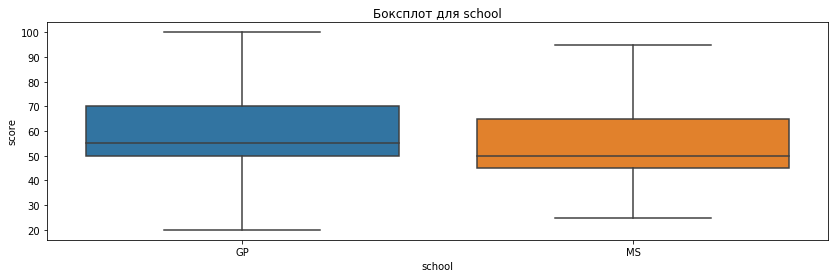

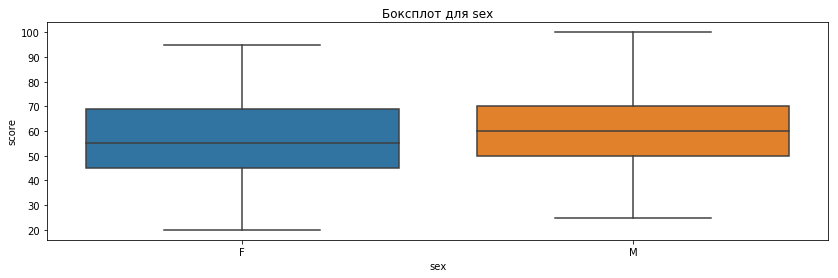

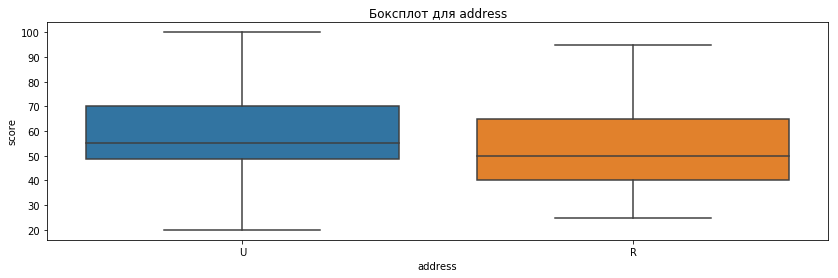

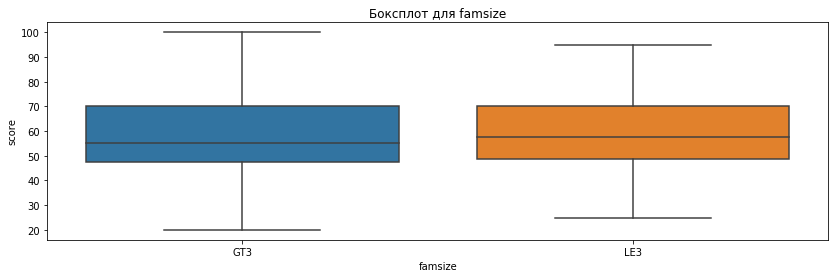

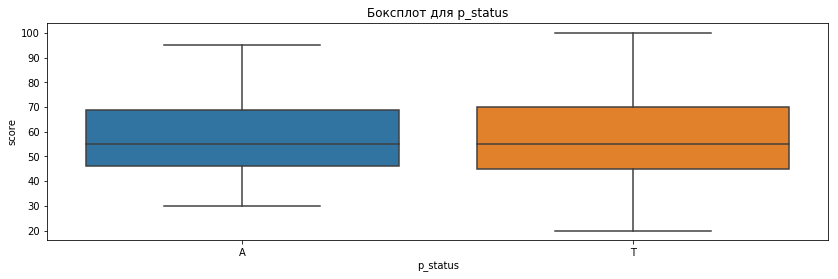

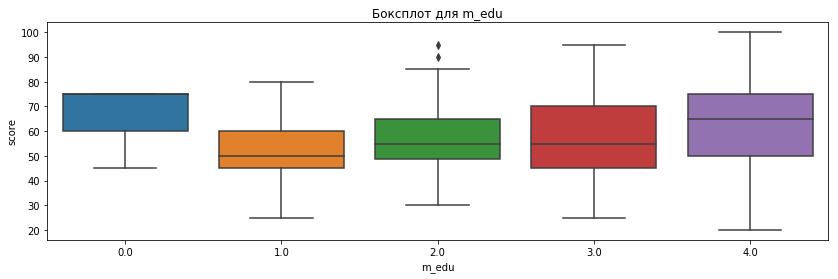

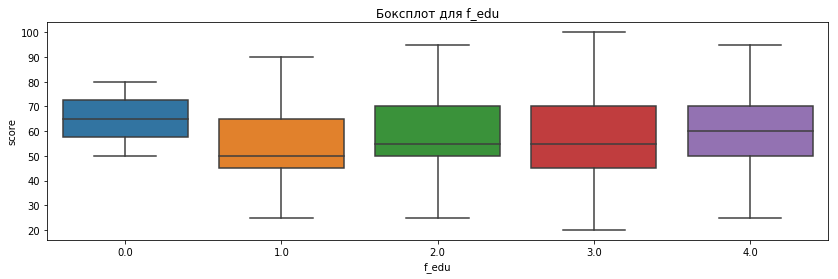

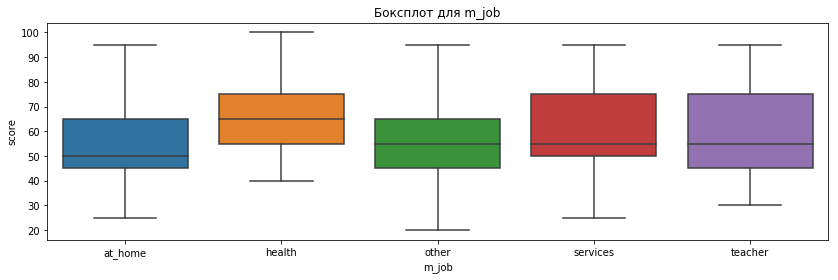

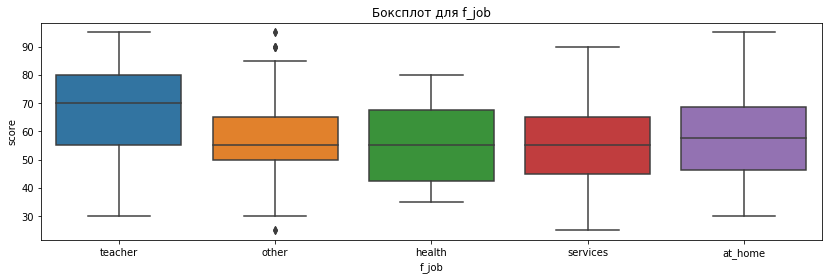

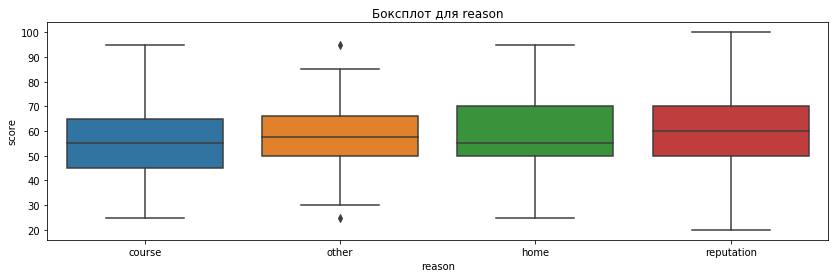

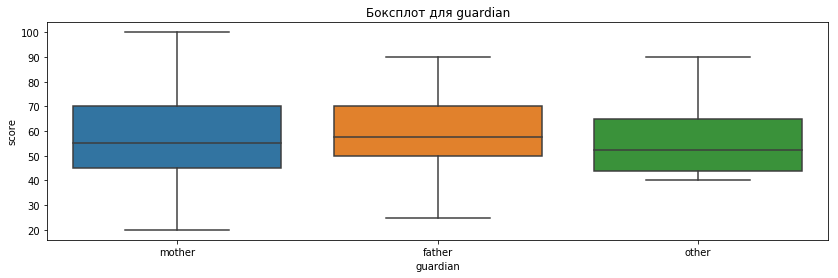

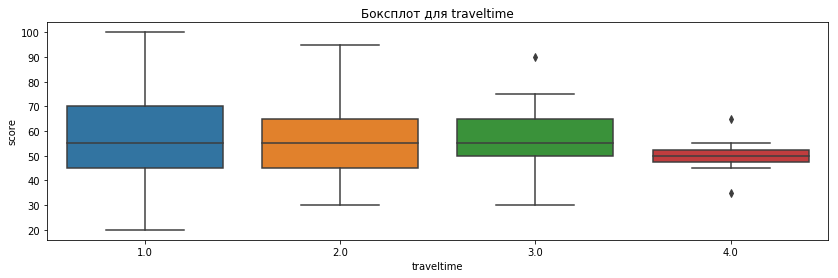

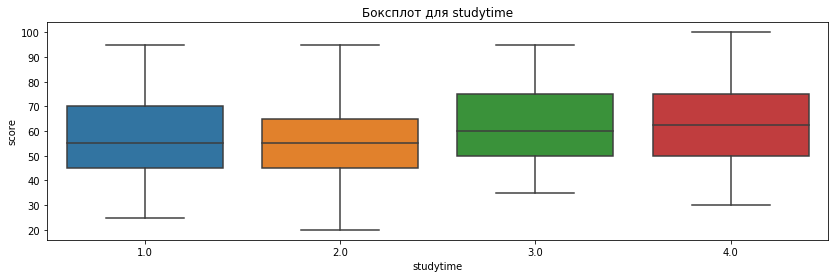

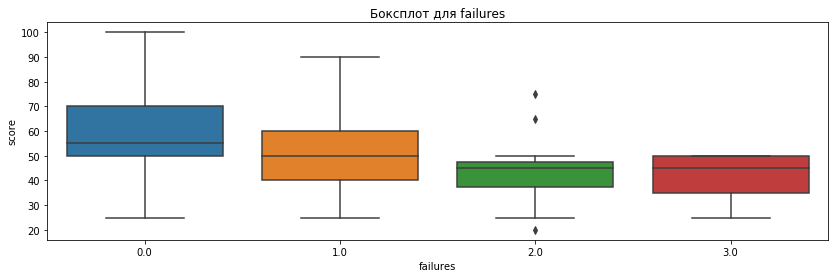

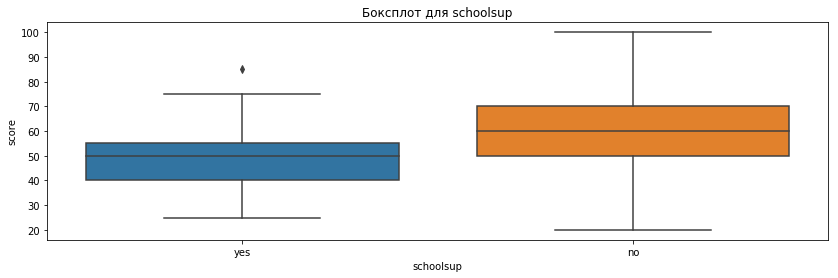

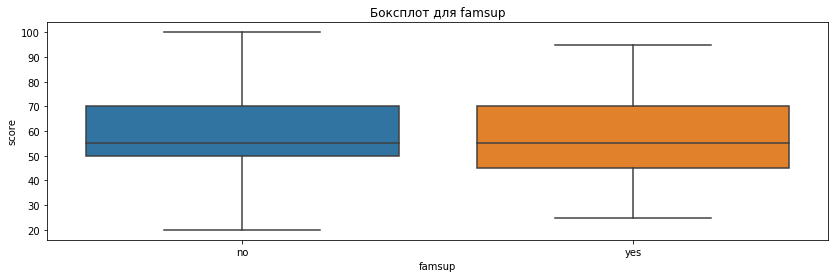

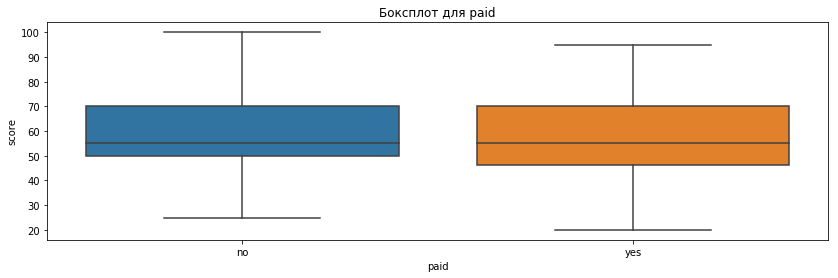

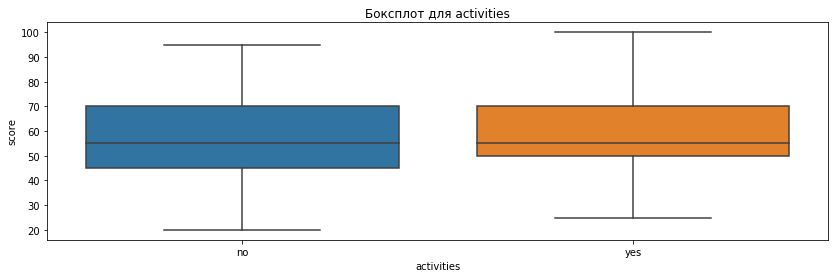

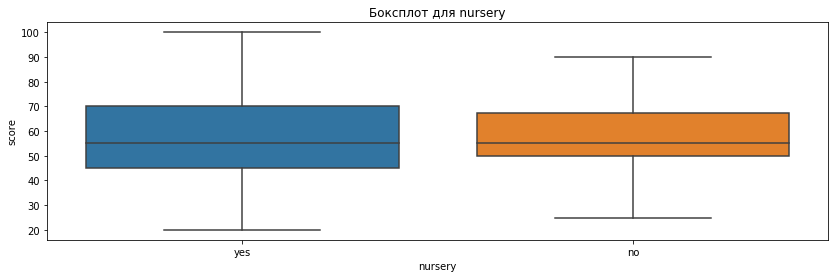

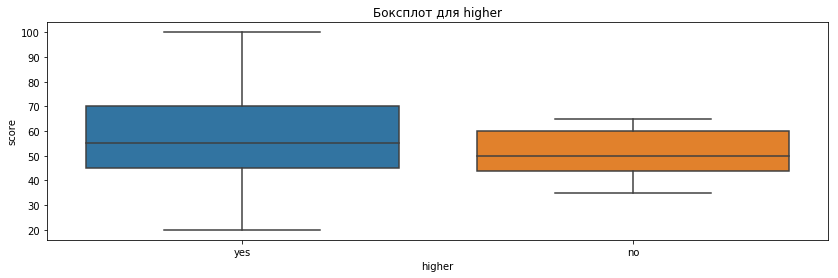

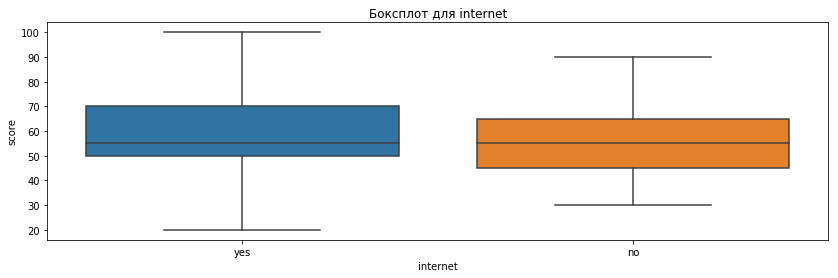

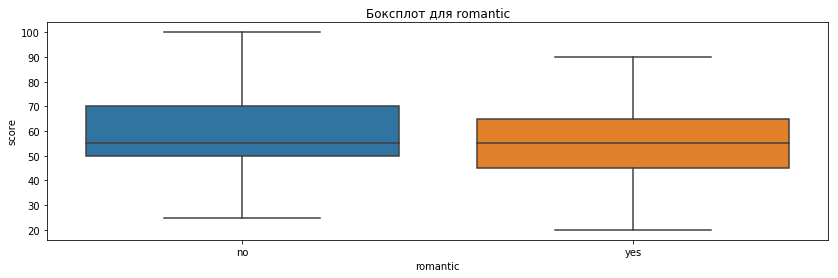

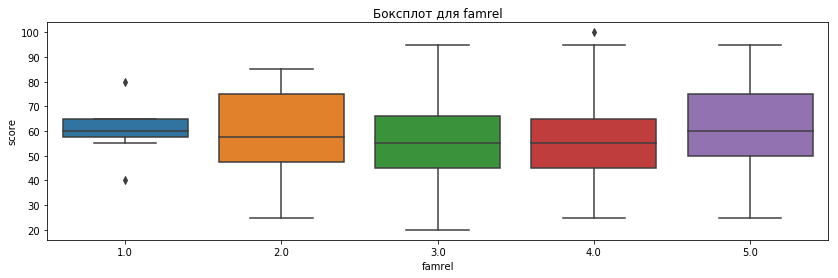

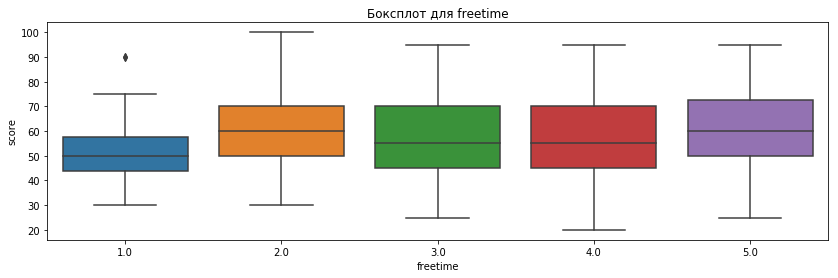

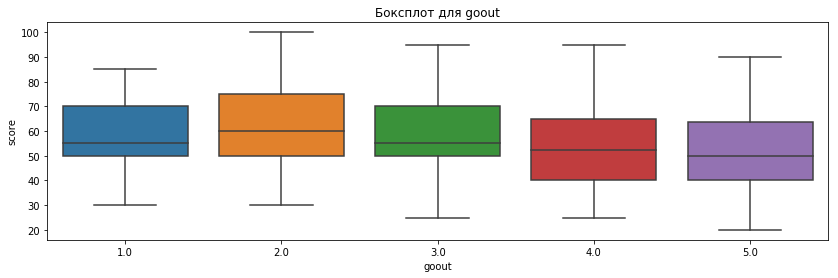

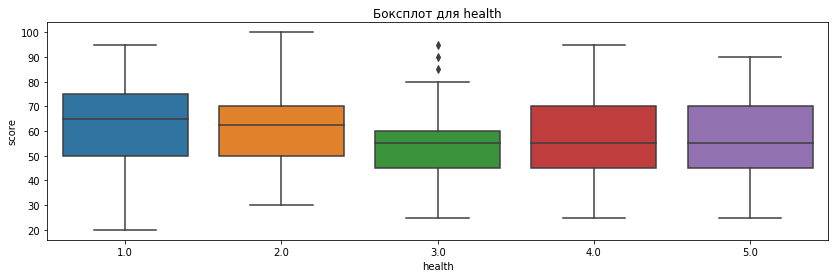

In [93]:
for column in columns_list:
    if column not in ('age','score','absences'):
        boxplot_analysis(column)

Визуально выглядит так что

Теперь проверим критерий Стьюдента

In [94]:
def get_stat_dif(column):
    cols = stud_math_pass.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math_pass.loc[stud_math_pass.loc[:, column] == comb[0], 'score'], 
                        stud_math_pass.loc[stud_math_pass.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [95]:
for column in columns_list:
    if column not in ('age','score','absences'):
        get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки f_job
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются следующие номинативные параметры: sex, address, m_edu, f_edu, m_job, f_job, studytime, failures, schoolsup и schoolsup

In [96]:
ml_prepared = stud_math_pass.loc[:, ['age', 'absences', 'address', 'schoolsup', 
                              'm_edu', 'f_edu', 'm_job', 'f_job', 
                              'studytime', 'failures', 'goout', 'paid', 'higher','romantic', 'score']]

Выводы:
1. Для анализа данных был получен датасет с описанием условий жизни учащихся в возрасте от 15 до 22 лет и результатами их итогового экзамена по математике
2. В датасете было мало пустых значений - не более 5% от датасета для большинства столбцов
3. В данных содержались выбросы:
    3.1 для столбцов famrel и fedu - скорее опечатки, категориальные признаки с лишним знаком или нулем, заменили на корректные значения 
    3.2 выброс в age - удалён
    3.3 под подозрением на наличие выбросов был столбец absences - но его распределение является логнормальным, все в порядке 
4. Был найден линейно зависимый столбец studytime_granular - удалён
5. Была выявлена прямая зависимость нулевых значений в score и нулевой посещаемости
6. Параметры, которые планируются к использованию после проведенного анализа:
'age', 'absences', 'address', 'schoolsup', 'm_edu', 'f_edu', 'm_job', 'f_job','studytime', 'failures', 'goout', 'paid', 'higher','romantic', 'score'